In [1]:
import pandas as pd
import numpy as np 
from gpxutils import parse_gpx 
import matplotlib.pyplot as plt
%matplotlib inline

# Analysis of Cycling Data

We are provided with four files containing recordings of cycling activities that include GPS location data as
well as some measurements related to cycling performace like heart rate and power.  The goal is to perform
some exploration and analysis of this data. 

The data represents four races.  Two are time trials where the rider rides alone on a set course.  Two are 
road races where the rider rides with a peleton.  All were held on the same course but the road races include
two laps where the time trials include just one. 

Questions to explore with the data:
* What is the overall distance travelled for each of the rides? What are the average speeds etc.  Provide a summary for each ride.
* Compare the range of speeds for each ride, are time trials faster than road races? 
* Compare the speeds achieved in the two time trials (three years apart).  As well as looking at the averages, can you see where in the ride one or the other is faster.  
* From the elevation_gain field you can see whether the rider is _climbing_ , _descending_ or on the _flat_.   Use this to calculate the average speeds in those three cases (climbing, flat or descending).  Note that _flat_ might not be zero elevation_gain but might allow for slight climbs and falls.  

For time varying data like this it is often useful to _smooth_ the data using eg. a [rolling mean](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.rolling_mean.html).  You might want to experiment with smoothing in some of your analysis (not required but may be of interest).

## Description of Fields

* _index_ is a datetime showing the time that the observation was made (I wasn't riding at night, this is converted to UTC)
* __latitude, longitude, elevation__ from the GPS, the position of the rider at each timepoint, elevation in m
* __temperature__ the current ambient temperature in degrees celcius
* __power__ the power being generated by the rider in Watts
* __cadence__ the rotational speed of the pedals in revolutions per minute
* __hr__ heart rate in beats per minute
* __elevation_gain__ the change in elevation in m between two observations
* __distance__ distance travelled between observations in km
* __speed__ speed measured in km/h

You are provided with code in [gpxutils.py](gpxutils.py) to read the GPX XML format files that are exported by cycling computers and applications.  The sample files were exported from [Strava](https://strava.com/) and represent four races by Steve Cassidy.


In [2]:
# read the four data files
rr_2016 = parse_gpx('files/Calga_RR_2016.gpx')
tt_2016 = parse_gpx('files/Calga_TT_2016.gpx')
rr_2019 = parse_gpx('files/Calga_RR_2019.gpx')
tt_2019 = parse_gpx('files/Calga_TT_2019.gpx')

In [3]:
rr_2016.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-05-14 04:02:41+00:00,-33.415561,151.222303,208.6,29.0,0.0,40.0,102.0,0.000000,0.0,0.000000,NaN
2016-05-14 04:02:42+00:00,-33.415534,151.222289,208.6,29.0,0.0,40.0,102.0,0.003271,0.0,11.777020,1.0
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0


# Summary for 2016 Road Race

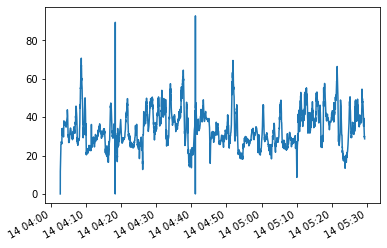

<AxesSubplot:>

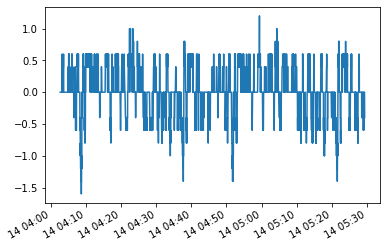

In [8]:
rr_2016['speed'].plot()
plt.show()
rr_2016['elevation_gain'].plot()

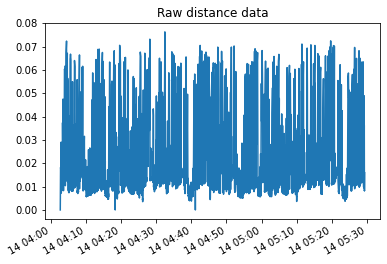

count    2822.000000
mean        0.017381
std         0.015695
min         0.000000
25%         0.007894
50%         0.011794
75%         0.016899
max         0.076283
Name: distance, dtype: float64
Number of distances at 0km:  3


In [25]:
rr_2016['distance'].plot()
plt.title("Raw distance data")
plt.show()
print(rr_2016['distance'].describe())
print("Number of distances at 0km: ", len(rr_2016[rr_2016['distance'] == 0]))

There appears to be no obvious outliers, in terms of higher speeds, however, there are 3 cases of zero distance being travelled, which could be an outlier. One of which is the start of the race so it obviously isn't an outlier.

In [27]:
zero_distance_rr2016 = rr_2016[rr_2016['distance'] == 0] 
zero_distance_rr2016.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-05-14 04:02:41+00:00,-33.415561,151.222303,208.6,29.0,0.0,40.0,102.0,0.0,0.0,0.0,NaN
2016-05-14 04:18:20+00:00,-33.350502,151.229872,248.0,27.0,0.0,76.0,150.0,0.0,0.0,0.0,2.0
2016-05-14 04:41:09+00:00,-33.395848,151.215595,218.4,25.0,0.0,83.0,171.0,0.0,-0.4,0.0,1.0


In [13]:
print("Total distance travelled of the 2016 road race:", rr_2016['distance'].sum())
print("Average speed of the 2016 road race:", rr_2016['speed'].mean())

ca

Total distance travelled of the 2016 road race: 49.04858574628638
Average speed of the 2016 road race: 34.93308475482947


# Summary for 2016 Time Trial

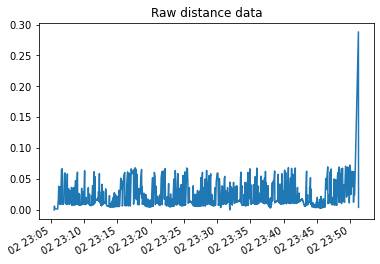

In [22]:
tt_2016['distance'].plot()
plt.title("Raw distance data")
plt.show()

As can be seen from this graph, there is an outlier, or outliers near the end of the data

In [27]:
print(tt_2016['distance'].describe())

print("Number of observations above 0.1km:", len(tt_2016[tt_2016['distance'] > 0.1]))

count    1541.000000
mean        0.016095
std         0.015897
min         0.000000
25%         0.007622
50%         0.010974
75%         0.015960
max         0.288175
Name: distance, dtype: float64
Number of observations above 0.1km: 1


This determines that there is only 1 data point that is an outlier so we will discard it as it isn't representative of the data set.

In [33]:
clean_tt2016 = tt_2016[tt_2016['distance'] <= 0.1]

print("Overall distance travelled in 2016 time trial: ", clean_tt2016['distance'].sum())

Overall distance travelled in 2016 time trial:  24.514712135824688


# Summary for Road Race 2019

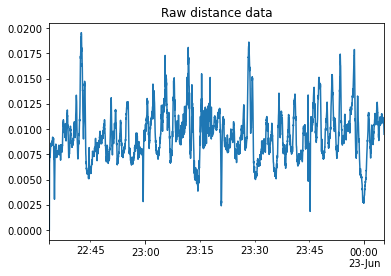

In [28]:
rr_2019['distance'].plot()
plt.title("Raw distance data")
plt.show()

In [29]:
print("Overall distance travlled:", rr_2019['distance'].sum(),"km")

Overall distance travlled: 51.78913253596059 km


# Summary for Time Trial 2019

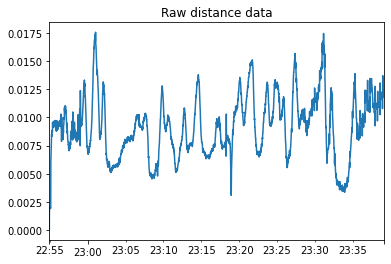

In [29]:
tt_2019['distance'].plot()
plt.title("Raw distance data")
plt.show()

In [30]:
print("Overall distance travlled:", tt_2019['distance'].sum(),"km")

Overall distance travlled: 24.38014504376575 km


## Challenge: Gear Usage

A modern race bike has up to 22 different gears with two chainrings on the front (attached to the pedals) and 10 or 11 at the back (attached to the wheel).   The ratio of the number of teeth on the front and rear cogs determines the distance travelled with one revolution of the pedals (often called __development__, measured in metres).  Low development is good for climbing hills while high development is for going fast downhill or in the final sprint. 

We have a measure of the number of rotations of the pedals per minute (__cadence__) and a measure of __speed__.  Using these two variables we should be able to derive a measure of __development__ which would effectivly tell us which gear the rider was using at the time.   Development will normally range between __2m__ and __10m__.  Due to errors in GPS and cadence measurements you will see many points outside this range and you should just discard them as outliers. 

Write code to calculate __development__ in _meters_ for each row in a ride.  Plot the result in a _histogram_ and compare the plots for the four rides.   Comment on what you observe in the histograms.



